In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mcu
from importlib import reload

reload(mcu)

<module 'mcu' from '/home/glebka/cub/thesis/manifold-learning/mcu.py'>

In [2]:
control_vars = mcu.get_control_vars(mcu.get_p())
response_matrix = mcu.generate_array_of_swiss_rolls(control_vars)
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, response_matrix)
q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges)

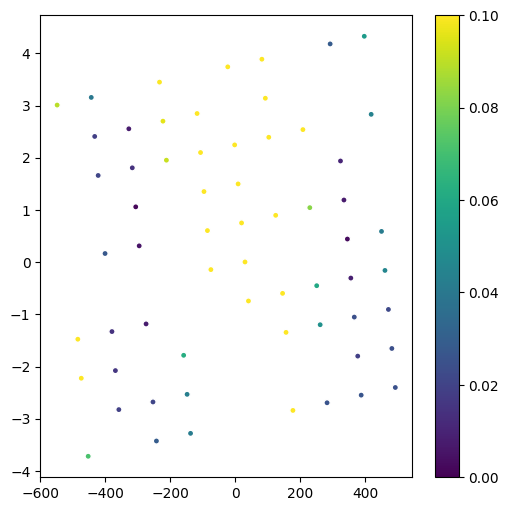

0.04222355374080621


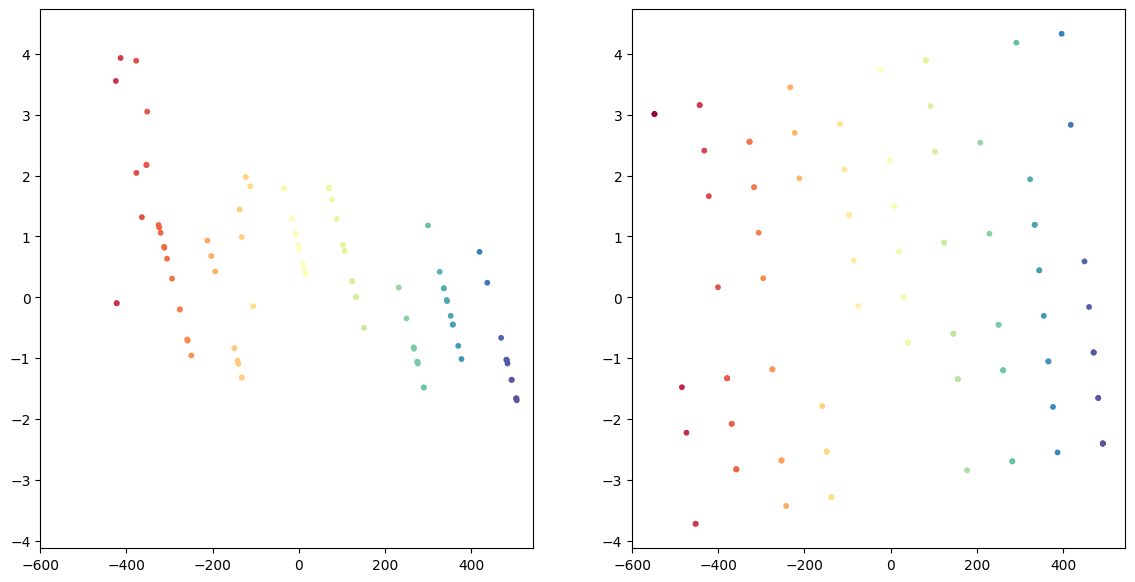

In [3]:
m_ = control_vars.shape[1]
# m_ = get_optimal_dimensionality(s)
ld_embedding = mcu.reduce_dimensions(q, m_)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

rre = mcu.compute_rre(ld_embedding, reconstructed_y)
mcu.plot_rre_heatmap(rre, reconstructed_y)
print(np.median(rre))
mcu.plot_two_embeddings(ld_embedding, reconstructed_y)

In [4]:
reload(mcu)
test_control_vars = mcu.get_control_vars(mcu.get_p(), 300)
test_rolls = mcu.generate_array_of_swiss_rolls(test_control_vars, 300)
x_opts = []
for (roll, control_var) in zip(test_rolls, test_control_vars):
    x_opt, x_err = mcu.predictive_optimization(roll, centered_y, ld_embedding, regression_matrix, y_means, y_scaler)
    x_opt = x_opt * x_stds + x_means
    x_opts.append(x_opt)
    print("-----------")
    print(f"x_opt  = {x_opt}, x_err = {x_err}")
    print(f"x_real = {control_var}")

x_ops = np.array(x_opts)
test_control_vars = np.array(test_control_vars)

-----------
x_opt  = [3.32072385 6.91391558], x_err = 7.750969991870666e-12
x_real = [8 6]
-----------
x_opt  = [8.04652274 5.32256102], x_err = 1.0302066717614255e-14
x_real = [6 7]
-----------
x_opt  = [5.71446396 6.80310194], x_err = 1.187580677946694e-12
x_real = [9 6]
-----------
x_opt  = [3.65423193 2.55922733], x_err = 9.373317187849582e-12
x_real = [5 2]
-----------
x_opt  = [3.34757297 3.56827861], x_err = 7.558830422094255e-13
x_real = [3 4]
-----------
x_opt  = [7.41344313 2.43296949], x_err = 1.0230612222940262e-11
x_real = [6 2]
-----------
x_opt  = [6.37652838 2.17838176], x_err = 3.3146805870707164e-13
x_real = [1 2]
-----------
x_opt  = [5.12923814 4.80123311], x_err = 8.54754743528715e-12
x_real = [4 4]
-----------
x_opt  = [2.28788937 2.62451142], x_err = 8.91849553110509e-12
x_real = [3 2]
-----------
x_opt  = [9.67012144 8.58565888], x_err = 1.1017685645468644e-11
x_real = [ 8 10]
-----------
x_opt  = [8.90361956 4.50627553], x_err = 2.3832344039797617e-12
x_real = 

[4.7676899  2.64613999 3.38226548 1.45733555 0.55424753 1.47827063
 5.37948673 1.38461304 0.94716211 2.18853066 1.96979246 2.82755781
 6.99625866 0.65616156 1.46011312 1.76063052 6.51148235 0.55317417
 1.17873076 2.81675444 2.65925644 4.68662495 4.77738383 4.24988077
 6.90058728 2.28422903 6.43702266 4.8588014  5.59217187 5.75846085
 2.61926864 1.55782214 5.61327567 5.69021117 0.79313494 3.16090099
 1.72874931 1.94683665 2.203834   5.98802698 4.23416739 1.04181219
 4.40430481 2.21578509 2.07167797 1.73258906 3.06322162 4.76800298
 1.70313944 4.93627892 0.9149784  3.55620644 3.44382132 1.36555143
 0.98390833 0.68373186 5.10942417 0.52881622 0.89033361 3.45610459
 1.93081736 4.41427897 1.1286031  1.15009796 2.70723109 6.32402762
 5.7437451  0.94484445 2.42121946 4.3334102  2.94931888 8.68631318
 4.80489329 0.64740168 0.78470177 2.68083285 1.66521999 2.96822966
 2.37084387 2.17213756 1.55978875 2.13457282 3.7502663  4.38934314
 3.9596636  3.59745597 0.95396552 1.53904558 1.10595484 4.4664

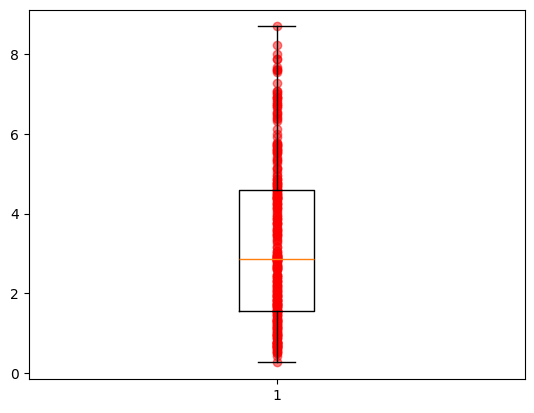

In [5]:
errors = np.linalg.norm(x_opts - test_control_vars, axis = 1)
plt.boxplot(errors)
plt.scatter(np.ones_like(errors), errors, alpha=0.5, color='red')
print(errors)
print(f"Median of errors = {np.median(errors)}")